In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data=pd.read_csv('data.csv')
data.head(1)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0


In [42]:
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

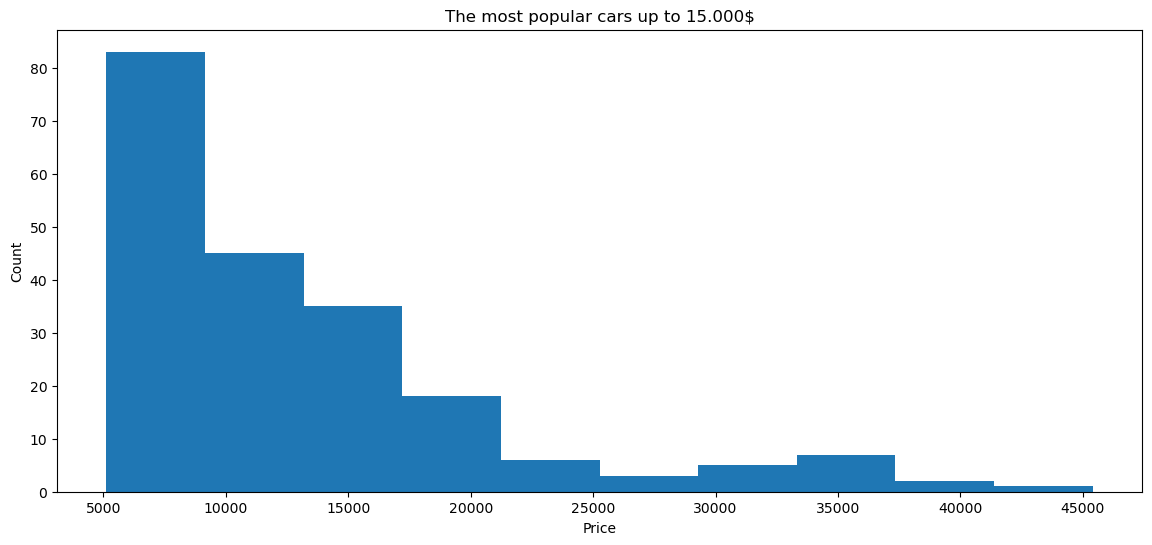

In [43]:
price = data['price']
plt.figure(figsize=(14,6))
plt.hist(price, bins=10)
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('The most popular cars up to 15.000$')
plt.show()


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [45]:
from sklearn.preprocessing import LabelEncoder
data=data.drop('CarName',axis=1)

label_encoder = LabelEncoder()
for i in data.columns:
    if data[i].dtype=='object':
        data[i]=label_encoder.fit_transform(data[i])


<Axes: >

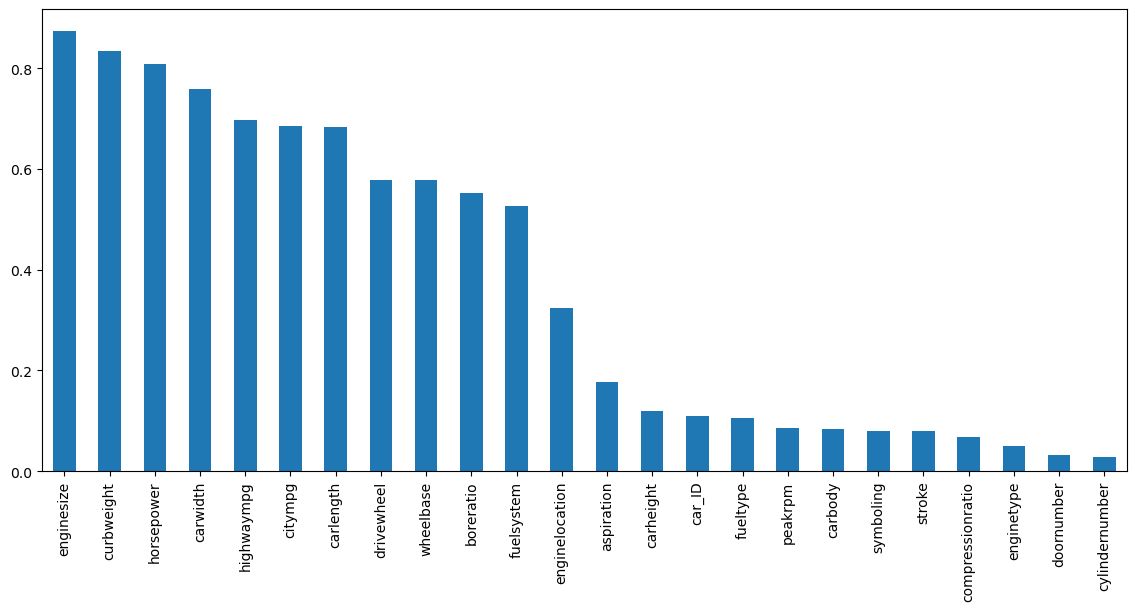

In [46]:
corr = data.corr()
price_corr = corr['price']
price_corr.abs().sort_values(ascending=False)[1:].plot.bar(figsize=(14,6))

In [47]:
X=data.drop('price',axis=1)
y=data['price']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

In [52]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
model.score(X_test,y_test)

0.8457080563016883

In [54]:
from sklearn.metrics import mean_absolute_error
MAE=mean_absolute_error(y_test,y_pred)
print('mistake is',MAE,'$')

mistake is 2143.3048780487807 $
